# mpfit tutorial
written by Zoe L de Beurs


In [23]:
# Download the mpfit.py script from Github: https://github.com/segasai/astrolibpy/blob/master/mpfit/mpfit.py
# You do not need to pip install it or anything. Just download the mpfit.py script, place it in your working directory,
# and it should work.


In [24]:
# import packages
import numpy as np
import matplotlib.pylab as plt
from mpfit import mpfit

In [17]:
# Define the actual model function that describes the data you are fitting. As an example, we define a sine curve here.
def func(x, p):
    xc, xy, r, u = p
    return p[0] + p[1] * np.sin(p[2]*x - p[3])

In [18]:
# Define a simple minimization function. This can be changed if you'd like.
def least(p, args):
    x, y = args
    return func(x, p) - y

In [19]:
# Define a function that passes that guesses for the parameters p and starts the search for the best-fit solution.
# By default, MPFIT calculates derivatives numerically via a finite difference approximation. This can be changed. 
# See https://github.com/segasai/astrolibpy/blob/master/mpfit/mpfit.py for instructions on how to change this.

def myfunct(p, fjac=None, x=None, y=None, err=None):
    # Parameter values are passed in "p"
    # If fjac==None then partial derivatives should not be
    # computed.  It will always be None if MPFIT is called with default
    # flag.
    model = func(x, p)
    # Non-negative status value means MPFIT should continue, negative means
    # stop the calculation.
    status = 0
    return [status, (y-model)]

In [20]:
# Generate data. Change this to your actual data when fitting observations with a model.
p = [1, 1.5, 0.2, 0.5]
x = np.linspace(-20, 10, 30)
y = func(x, p)

# Add some Gaussian noise
y += np.random.normal(0, 0.05, y.shape)

# choose starting values for parameter you are trying to fit
pstart = [1, 1, 0.1, 1]

# choose step sizes for those parameters. These step sizes will need to be optimized for your specific parameters.
# The size of the step sizes should be approximately the expected uncertainties on those parameters.
parinfo = [{'fixed': False, 'step': 1e-3},
           {'fixed': False, 'step': 1e-2},
           {'fixed': False, 'step': 1e-3},
           {'fixed': False, 'step': 1e-2}]

fa = {'x':x, 'y':y,}

# Run mpfit
m = mpfit(myfunct, pstart, functkw=fa, parinfo=parinfo)


Iter       1    CHI-SQUARE =  30.15798012  DOF =  26
   P0 = 1  
   P1 = 1  
   P2 = 0.1  
   P3 = 1  
Iter       2    CHI-SQUARE =  1.85443631  DOF =  26
   P0 = 1.019711421  
   P1 = 1.293391199  
   P2 = 0.2295541133  
   P3 = 0.4001013939  
Iter       3    CHI-SQUARE =  0.1729647241  DOF =  26
   P0 = 0.9501648303  
   P1 = 1.449718171  
   P2 = 0.2024086789  
   P3 = 0.4752107727  
Iter       4    CHI-SQUARE =  0.06161513337  DOF =  26
   P0 = 1.00327587  
   P1 = 1.508976606  
   P2 = 0.2012967299  
   P3 = 0.4921713684  
Iter       5    CHI-SQUARE =  0.0616025708  DOF =  26
   P0 = 1.003699181  
   P1 = 1.509292078  
   P2 = 0.2012956449  
   P3 = 0.4917606156  
Iter       6    CHI-SQUARE =  0.06160256323  DOF =  26
   P0 = 1.003692948  
   P1 = 1.509292217  
   P2 = 0.2012964787  
   P3 = 0.49175629  
Iter       7    CHI-SQUARE =  0.06160256317  DOF =  26
   P0 = 1.003692869  
   P1 = 1.509292153  
   P2 = 0.2012964854  
   P3 = 0.4917562211  
Iter       8    CHI-SQUARE =  0.06

In [21]:
# extract the final parameters
m.params

array([1.00369287, 1.50929215, 0.20129649, 0.49175622])

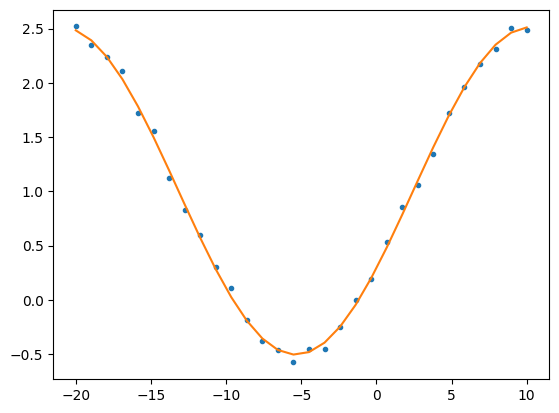

In [22]:
# plot the resulting fit
plt.plot(x, y, ".")
plt.plot(x, func(x, m.params))

# Have fun!